In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [3]:
#Noise Events
eve_01 = pd.read_csv("export_41/csv_results_41_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'])
# eve_02 = pd.read_csv("export_41/csv_results_41_255440_mp-02-naamsestraat-57-xior.csv",sep=';', parse_dates=['result_timestamp'])
# eve_03 = pd.read_csv("export_41/csv_results_41_255441_mp-03-naamsestraat-62-taste.csv",sep=';', parse_dates=['result_timestamp'])
# eve_04 = pd.read_csv("export_41/csv_results_41_303910_mp-04-his-hears.csv",sep=';', parse_dates=['result_timestamp'])
# eve_05 = pd.read_csv("export_41/csv_results_41_255442_mp-05-calvariekapel-ku-leuven.csv",sep=';', parse_dates=['result_timestamp'])
# eve_06 = pd.read_csv("export_41/csv_results_41_255443_mp-06-parkstraat-2-la-filosovia.csv",sep=';', parse_dates=['result_timestamp'])
# eve_07 = pd.read_csv("export_41/csv_results_41_255444_mp-07-naamsestraat-81.csv",sep=';', parse_dates=['result_timestamp'])
# eve_08 = pd.read_csv("export_41/csv_results_41_255445_mp-08-kiosk-stadspark.csv",sep=';', parse_dates=['result_timestamp'])
# eve_09 = pd.read_csv("export_41/csv_results_41_280324_mp08bis---vrijthof.csv",sep=';', parse_dates=['result_timestamp'])

In [6]:
#Noise level data
nl_01 = pd.read_csv("export_42/csv_results_42_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'])
nl_02 = pd.read_csv("export_42/csv_results_42_255440_mp-02-naamsestraat-57-xior.csv",sep=';', parse_dates=['result_timestamp'])
nl_03 = pd.read_csv("export_42/csv_results_42_255441_mp-03-naamsestraat-62-taste.csv",sep=';', parse_dates=['result_timestamp'])
nl_04 = pd.read_csv("export_42/csv_results_42_303910_mp-04-his-hears.csv",sep=';', parse_dates=['result_timestamp'])
nl_05 = pd.read_csv("export_42/csv_results_42_255442_mp-05-calvariekapel-ku-leuven.csv",sep=';', parse_dates=['result_timestamp'])
nl_06 = pd.read_csv("export_42/csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",sep=';', parse_dates=['result_timestamp'])
nl_07 = pd.read_csv("export_42/csv_results_42_255444_mp-07-naamsestraat-81.csv",sep=';', parse_dates=['result_timestamp'])
nl_08 = pd.read_csv("export_42/csv_results_42_255445_mp-08-kiosk-stadspark.csv",sep=';', parse_dates=['result_timestamp'])
nl_09 = pd.read_csv("export_42/csv_results_42_280324_mp08bis---vrijthof.csv",sep=';', parse_dates=['result_timestamp'])

In [76]:
#Meteo Data
LC_01 = pd.read_csv("dataverse_files/LC_2022Q1.csv")
LC_02 = pd.read_csv("dataverse_files/LC_2022Q2.csv")
LC_03 = pd.read_csv("dataverse_files/LC_2022Q3.csv")
LC_04 = pd.read_csv("dataverse_files/LC_2022Q4.csv")
Meta = pd.read_csv("dataverse_files/01_Metadata_v2.csv")

In [77]:
eve_nl_06

,#object_id_x,description_x,result_timestamp_x,noise_event_laeq_model_id,noise_event_laeq_model_id_unit,noise_event_laeq_primary_detected_certainty,noise_event_laeq_primary_detected_certainty_unit,noise_event_laeq_primary_detected_class,noise_event_laeq_primary_detected_class_unit,result_timestamp_second,...,result_timestamp_y,lamax,lamax_unit,laeq,laeq_unit,lceq,lceq_unit,lcpeak,lcpeak_unit,date
0,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-01 00:00:11.418,NaN,NaN,NaN,%,NaN,NaN,01/01/2022-00:00:11,...,2022-01-01 00:00:11.419,80.3,dB(A),77.3,dB(A),78.61,dB(C),90.27,dB(C),01/01/2022
1,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-01 01:18:57.422,NaN,NaN,NaN,%,NaN,NaN,01/01/2022-01:18:57,...,2022-01-01 01:18:57.422,73.8,dB(A),70.0,dB(A),71.54,dB(C),86.64,dB(C),01/01/2022
2,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-01 01:20:04.422,NaN,NaN,NaN,%,NaN,NaN,01/01/2022-01:20:04,...,2022-01-01 01:20:04.422,87.8,dB(A),83.7,dB(A),85.22,dB(C),96.90,dB(C),01/01/2022
3,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-01 01:20:19.422,NaN,NaN,NaN,%,NaN,NaN,01/01/2022-01:20:19,...,2022-01-01 01:20:19.422,79.6,dB(A),73.0,dB(A),75.19,dB(C),93.75,dB(C),01/01/2022
4,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-01 01:20:25.422,NaN,NaN,NaN,%,NaN,NaN,01/01/2022-01:20:25,...,2022-01-01 01:20:25.422,80.6,dB(A),77.7,dB(A),78.90,dB(C),92.82,dB(C),01/01/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-31 10:45:51.833,NaN,NaN,NaN,%,NaN,NaN,31/01/2022-10:45:51,...,2022-01-31 10:45:51.833,73.7,dB(A),71.4,dB(A),80.39,dB(C),91.15,dB(C),31/01/2022
293,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-31 10:47:47.911,NaN,NaN,NaN,%,NaN,NaN,31/01/2022-10:47:47,...,2022-01-31 10:47:47.911,72.3,dB(A),71.2,dB(A),77.64,dB(C),89.41,dB(C),31/01/2022
294,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-31 11:59:48.223,NaN,NaN,NaN,%,NaN,NaN,31/01/2022-11:59:48,...,2022-01-31 11:59:48.223,73.5,dB(A),71.5,dB(A),71.92,dB(C),85.08,dB(C),31/01/2022
295,255443,MP 06: Parkstraat 2 La Filosovia,2022-01-31 13:02:15.936,NaN,NaN,NaN,%,NaN,NaN,31/01/2022-13:02:15,...,2022-01-31 13:02:15.937,68.6,dB(A),68.3,dB(A),76.11,dB(C),85.93,dB(C),31/01/2022


# Daily average of laf005/h

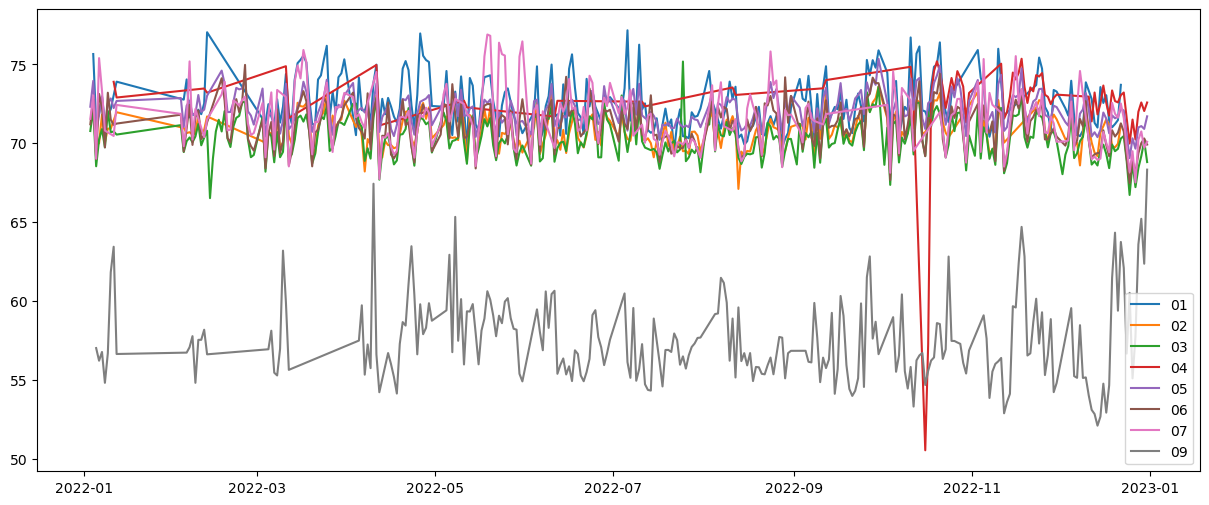

In [78]:
plt.subplots(figsize=(15, 6))

daily_average_01 = per_01.groupby(per_01['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_02 = per_02.groupby(per_02['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_03 = per_03.groupby(per_03['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_04 = per_04.groupby(per_04['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_05 = per_05.groupby(per_05['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_06 = per_06.groupby(per_06['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_07 = per_07.groupby(per_07['result_timestamp'].dt.date)['laf005_per_hour'].mean()
#daily_average_08 = per_08.groupby(per_08['result_timestamp'].dt.date)['laf005_per_hour'].mean()
daily_average_09 = per_09.groupby(per_09['result_timestamp'].dt.date)['laf005_per_hour'].mean()

plt.plot(daily_average_01)
plt.plot(daily_average_02)
plt.plot(daily_average_03)
plt.plot(daily_average_04)
plt.plot(daily_average_05)
plt.plot(daily_average_06)
plt.plot(daily_average_07)
#plt.plot(daily_average_08)
plt.plot(daily_average_09)

plt.legend(['01', '02', '03', '04','05', '06', '07', '09'])
plt.show()

# Merge event data and noise level data

In [79]:
eve_01.loc[:,['noise_event_laeq_primary_detected_class']].value_counts()

noise_event_laeq_primary_detected_class
Transport road - Passenger car             15455
Unsupported                                 6744
Human voice - Shouting                      2499
Human voice - Singing                        239
Transport road - Siren                       124
Nature elements - Wind                        19
Music non-amplified                            9
dtype: int64

In [80]:
eve_01['result_timestamp_second'] = eve_01['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_02['result_timestamp_second'] = eve_02['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_03['result_timestamp_second'] = eve_03['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_04['result_timestamp_second'] = eve_04['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_05['result_timestamp_second'] = eve_05['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_06['result_timestamp_second'] = eve_06['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_07['result_timestamp_second'] = eve_07['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_08['result_timestamp_second'] = eve_08['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
eve_09['result_timestamp_second'] = eve_09['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))

In [81]:
nl_01['result_timestamp_second'] = nl_01['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_02['result_timestamp_second'] = nl_02['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_03['result_timestamp_second'] = nl_03['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_04['result_timestamp_second'] = nl_04['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_05['result_timestamp_second'] = nl_05['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_06['result_timestamp_second'] = nl_06['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_07['result_timestamp_second'] = nl_07['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_08['result_timestamp_second'] = nl_08['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))
nl_09['result_timestamp_second'] = nl_09['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y-%H:%M:%S'))

In [82]:
eve_nl_01 = pd.merge(eve_01, nl_01, on=['result_timestamp_second'], how='inner')
eve_nl_02 = pd.merge(eve_02, nl_02, on=['result_timestamp_second'], how='inner')
eve_nl_03 = pd.merge(eve_03, nl_03, on=['result_timestamp_second'], how='inner')
eve_nl_04 = pd.merge(eve_04, nl_04, on=['result_timestamp_second'], how='inner')
eve_nl_05 = pd.merge(eve_05, nl_05, on=['result_timestamp_second'], how='inner')
eve_nl_06 = pd.merge(eve_06, nl_06, on=['result_timestamp_second'], how='inner')
eve_nl_07 = pd.merge(eve_07, nl_07, on=['result_timestamp_second'], how='inner')
eve_nl_08 = pd.merge(eve_08, nl_08, on=['result_timestamp_second'], how='inner')
eve_nl_09 = pd.merge(eve_09, nl_09, on=['result_timestamp_second'], how='inner')

In [102]:
df.head()


,#object_id_x,description_x,result_timestamp_x,noise_event_laeq_model_id,noise_event_laeq_model_id_unit,noise_event_laeq_primary_detected_certainty,noise_event_laeq_primary_detected_certainty_unit,noise_event_laeq_primary_detected_class,noise_event_laeq_primary_detected_class_unit,result_timestamp_second,...,result_timestamp_y,lamax,lamax_unit,laeq,laeq_unit,lceq,lceq_unit,lcpeak,lcpeak_unit,date
0,255439,MP 01: Naamsestraat 35 Maxim,2022-01-12 00:00:55.398,16.0,NaN,0.0,%,Unsupported,NaN,12/01/2022-00:00:55,...,2022-01-12 00:00:55.398,82.3,dB(A),77.9,dB(A),78.59,dB(C),94.68,dB(C),00:00:55
1,255439,MP 01: Naamsestraat 35 Maxim,2022-01-12 00:01:24.398,16.0,NaN,98.0,%,Transport road - Passenger car,NaN,12/01/2022-00:01:24,...,2022-01-12 00:01:24.398,69.6,dB(A),66.7,dB(A),77.75,dB(C),87.94,dB(C),00:01:24
2,255439,MP 01: Naamsestraat 35 Maxim,2022-01-12 00:07:42.399,16.0,NaN,79.0,%,Transport road - Passenger car,NaN,12/01/2022-00:07:42,...,2022-01-12 00:07:42.399,67.8,dB(A),66.7,dB(A),72.32,dB(C),82.77,dB(C),00:07:42
3,255439,MP 01: Naamsestraat 35 Maxim,2022-01-12 00:08:30.399,16.0,NaN,100.0,%,Human voice - Shouting,NaN,12/01/2022-00:08:30,...,2022-01-12 00:08:30.400,74.9,dB(A),69.6,dB(A),70.66,dB(C),85.00,dB(C),00:08:30
4,255439,MP 01: Naamsestraat 35 Maxim,2022-01-12 00:23:42.402,16.0,NaN,99.0,%,Human voice - Shouting,NaN,12/01/2022-00:23:42,...,2022-01-12 00:23:42.402,76.7,dB(A),72.0,dB(A),73.64,dB(C),87.58,dB(C),00:23:42


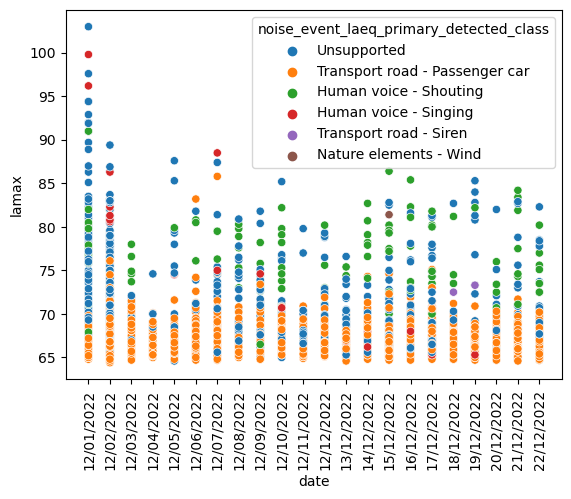

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df=eve_nl_01

df['noise_event_laeq_primary_detected_class'] = df['noise_event_laeq_primary_detected_class'].fillna('NaN')
df['date'] = df['result_timestamp_x'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y'))
#df=df[df['noise_event_laeq_primary_detected_class']=='Human voice - Shouting']
sns.scatterplot(x='date', y='lamax', hue='noise_event_laeq_primary_detected_class', data=df)

x_ticks = ax.get_xticks()
#ax.set_xticks(x_ticks[::100])
plt.xticks(rotation=90)
plt.show()

# Location map

In [85]:
import folium
from folium.plugins import MarkerCluster

In [86]:
loc = pd.DataFrame({
    'Latitude': [50.877145629042914, 50.876508363711494, 50.8758501663235, 50.87526199805131,50.87452362687141, 50.87423613960728, 50.87382304090069,50.875267749983614, 50.878747974857156],
    'Longitude': [4.700687827346834, 4.700571000329153, 4.700202605039998, 4.700102082393327, 4.699906626536335, 4.700032390606964, 4.7000419302889895, 4.701498137515181, 4.70113377876015],
    'Name': ['35','57','62','76', 'Calvarie Chapel','Corner of the Parkstraat & Naamse straat','81', 'Kiosk Stadspark','Vrijthof']
})

n = folium.Map(location=[50.87575041519845, 4.700329124579559], zoom_start=16)
marker_cluster = MarkerCluster().add_to(n)
for row in loc.itertuples():
    folium.Marker(location=[row.Latitude, row.Longitude],
                  popup=row.Name).add_to(marker_cluster)
n.save('noise_map.html')

In [87]:
w = folium.Map(location=[50.87575041519845, 4.700329124579559], zoom_start=12)
marker_cluster = MarkerCluster().add_to(w)

for row in Meta.itertuples():
    folium.Marker(location=[row.LAT, row.LON],
                  popup=row.ID).add_to(marker_cluster)
w.save('weather_station_map.html')